In [2]:
#### SVM claswsificationsifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

df = pd.get_dummies(df, drop_first=True)

# df = df.drop('User ID', axis=1)
    # X = df.drop('Purchased', axis=1)
    # y = df['Purchased']
df = df.drop(['User ID'], axis=1)

X = df.drop('Purchased', axis=1)
y = df['Purchased']


In [ ]:
###  Grid Search CV to find the best parameters for SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}
from sklearn.model_selection import GridSearchCV
gsv = GridSearchCV(SVC(), param_grid, cv=5)
gsv.fit(X, y)
gsv.best_params_


In [ ]:
### SVC with best parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

svm = SVC(**gsv.best_params_)   
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# svm_classifier = SVC(kernel='rbf', random_state=0)
# svc = svm_classifier.fit(X_train, y_train)
# y_pred = svc.predict(X_test)

# clsReport = classification_report(y_test, y_pred)
# print(clsReport)

              precision    recall  f1-score   support

           0       0.77      0.97      0.86        79
           1       0.90      0.44      0.59        41

    accuracy                           0.79       120
   macro avg       0.83      0.71      0.73       120
weighted avg       0.81      0.79      0.77       120



[[77  2]
 [23 18]]


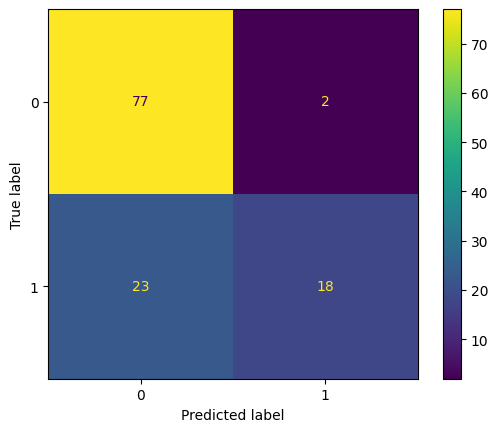

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay(cm).plot()